In [71]:
# Experiment 9 - K-Nearest Neighbour Classifier (Breast Cancer Dataset) with Visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [73]:
# Load dataset
df = pd.read_csv(r"/content/data.csv")
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [74]:
# Encode target: M -> 0, B -> 1
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

In [75]:
# Prepare features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

In [76]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [77]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
#  Fit & Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
#  Predict
y_pred = model.predict(X_test)

In [80]:
#  Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9239766081871345

Confusion Matrix:
 [[ 57   7]
 [  6 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



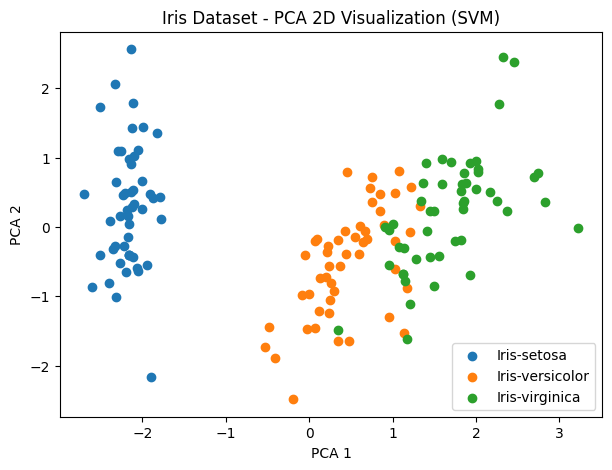

In [68]:

#  SIMPLE VISUALIZATION: PCA 2D PLOT
pca = PCA(n_components=2)
X_all_s = scaler.transform(X)
X_pca = pca.fit_transform(X_all_s)

plt.figure(figsize=(7,5))
for species in y.unique():
    mask = (y == species)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=species)

plt.title("Iris Dataset - PCA 2D Visualization (SVM)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

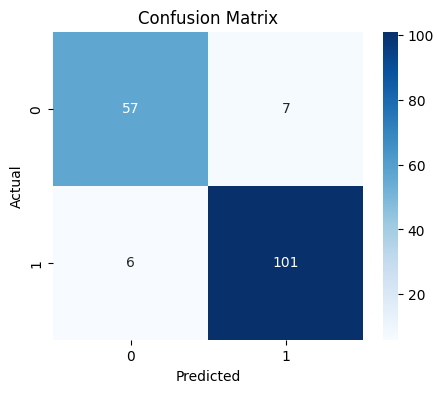

In [82]:
# 1. Confusion Matrix Heatmap
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

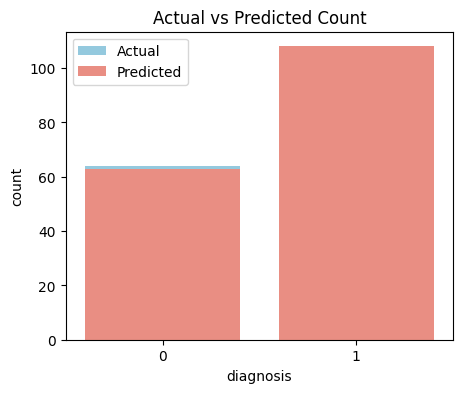

In [83]:
# 2. Bar chart: Actual vs Predicted comparison
plt.figure(figsize=(5,4))
sns.countplot(x=y_test, label="Actual", color='skyblue')
sns.countplot(x=y_pred, label="Predicted", color='salmon')
plt.legend()
plt.title("Actual vs Predicted Count")
plt.show()

/tmp/ipython-input-2938745794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette='pastel')


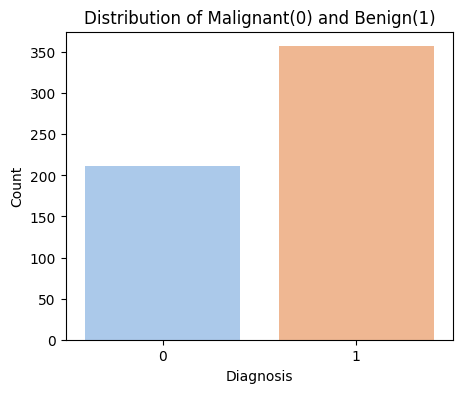

In [84]:
# 3. Count Plot of Diagnosis Distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df['diagnosis'], palette='pastel')
plt.title("Distribution of Malignant(0) and Benign(1)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()